In [1]:
using NCDatasets
using PyPlot
using PyCall
const plt = PyPlot
ccrs = pyimport("cartopy.crs")
cfeature = pyimport("cartopy.feature")
coast = cfeature.GSHHSFeature(scale="i")
mpl = pyimport("matplotlib")
#mpl.style.use("./fairease.mplstyle")
cmocean = pyimport("cmocean")

mpl = pyimport("matplotlib")
ls = mpl.colors.LightSource(azdeg=315, altdeg=45)
cmap = plt.cm.Greys

In [3]:
import Pkg; Pkg.add("Conda")

   Resolving package versions...
   Installed libwebp_jll ─ v1.5.0+0
   Installed LERC_jll ──── v4.0.1+0
   Installed Libtiff_jll ─ v4.7.1+0
      Compat entries added for Conda
    Updating `~/Projects/DIVAnd-FAIR-EASE/Project.toml`
⌅ [13f3f980] ↑ CairoMakie v0.12.16 ⇒ v0.12.18
  [8f4d0f93] + Conda v1.10.2
  [61d90e0f] ↑ GeoJSON v0.8.1 ⇒ v0.8.2
  [db073c08] ↑ GeoMakie v0.7.9 ⇒ v0.7.10
  [cd3eb016] ↑ HTTP v1.10.12 ⇒ v1.10.15
  [b946abbf] ↑ NaNStatistics v0.6.43 ⇒ v0.6.45
    Updating `~/Projects/DIVAnd-FAIR-EASE/Manifest.toml`
  [4fba245c] ↑ ArrayInterface v7.17.1 ⇒ v7.18.0
  [179af706] ↑ CFTime v0.1.3 ⇒ v0.1.4
⌅ [13f3f980] ↑ CairoMakie v0.12.16 ⇒ v0.12.18
  [d360d2e6] ↑ ChainRulesCore v1.25.0 ⇒ v1.25.1
  [a2cac450] ↑ ColorBrewer v0.4.0 ⇒ v0.4.1
  [35d6a980] ↑ ColorSchemes v3.27.1 ⇒ v3.28.0
  [f0e56b4a] ↑ ConcurrentUtilities v2.4.2 ⇒ v2.4.3
  [8f4d0f93] + Conda v1.10.2
  [927a84f5] ↑ DelaunayTriangulation v1.6.3 ⇒ v1.6.4
  [3c3547ce] ↑ DiskArrays v0.4.6 ⇒ v0.4.8
  [31c24e10] ↑ Distribu

In [2]:
using Conda
Conda.add("cmocean")

LoadError: ArgumentError: Package Conda not found in current path.
- Run `import Pkg; Pkg.add("Conda")` to install the Conda package.

In [13]:
theproj = ccrs.EuroPP()
datacrs = ccrs.PlateCarree()

PyObject <Projected CRS: +proj=eqc +ellps=WGS84 +a=6378137.0 +lon_0=0.0 +to ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (unknown)
- N[north]: Northing (unknown)
- h[up]: Ellipsoidal height (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Equidistant Cylindrical
Datum: Unknown based on WGS 84 ellipsoid
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

/home/ctroupin/.julia/conda/3/x86_64/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


In [15]:
nc = NCDataset("../data/NorthAdriatic_bathy.nc", "r")
lonb = nc["lon"][:]
latb = nc["lat"][:]
bathy = nc["bat"][:,:]
close(nc)

closed Dataset

In [20]:
bathy2plot1 = Float64.(copy(bathy));
bathy2plot2 = Float64.(copy(bathy));

bathy2plot1[bathy2plot1.>=0] .= NaN;
bathy2plot2[bathy2plot1.<0] .= 0.0;

### Prepare the shaded topography

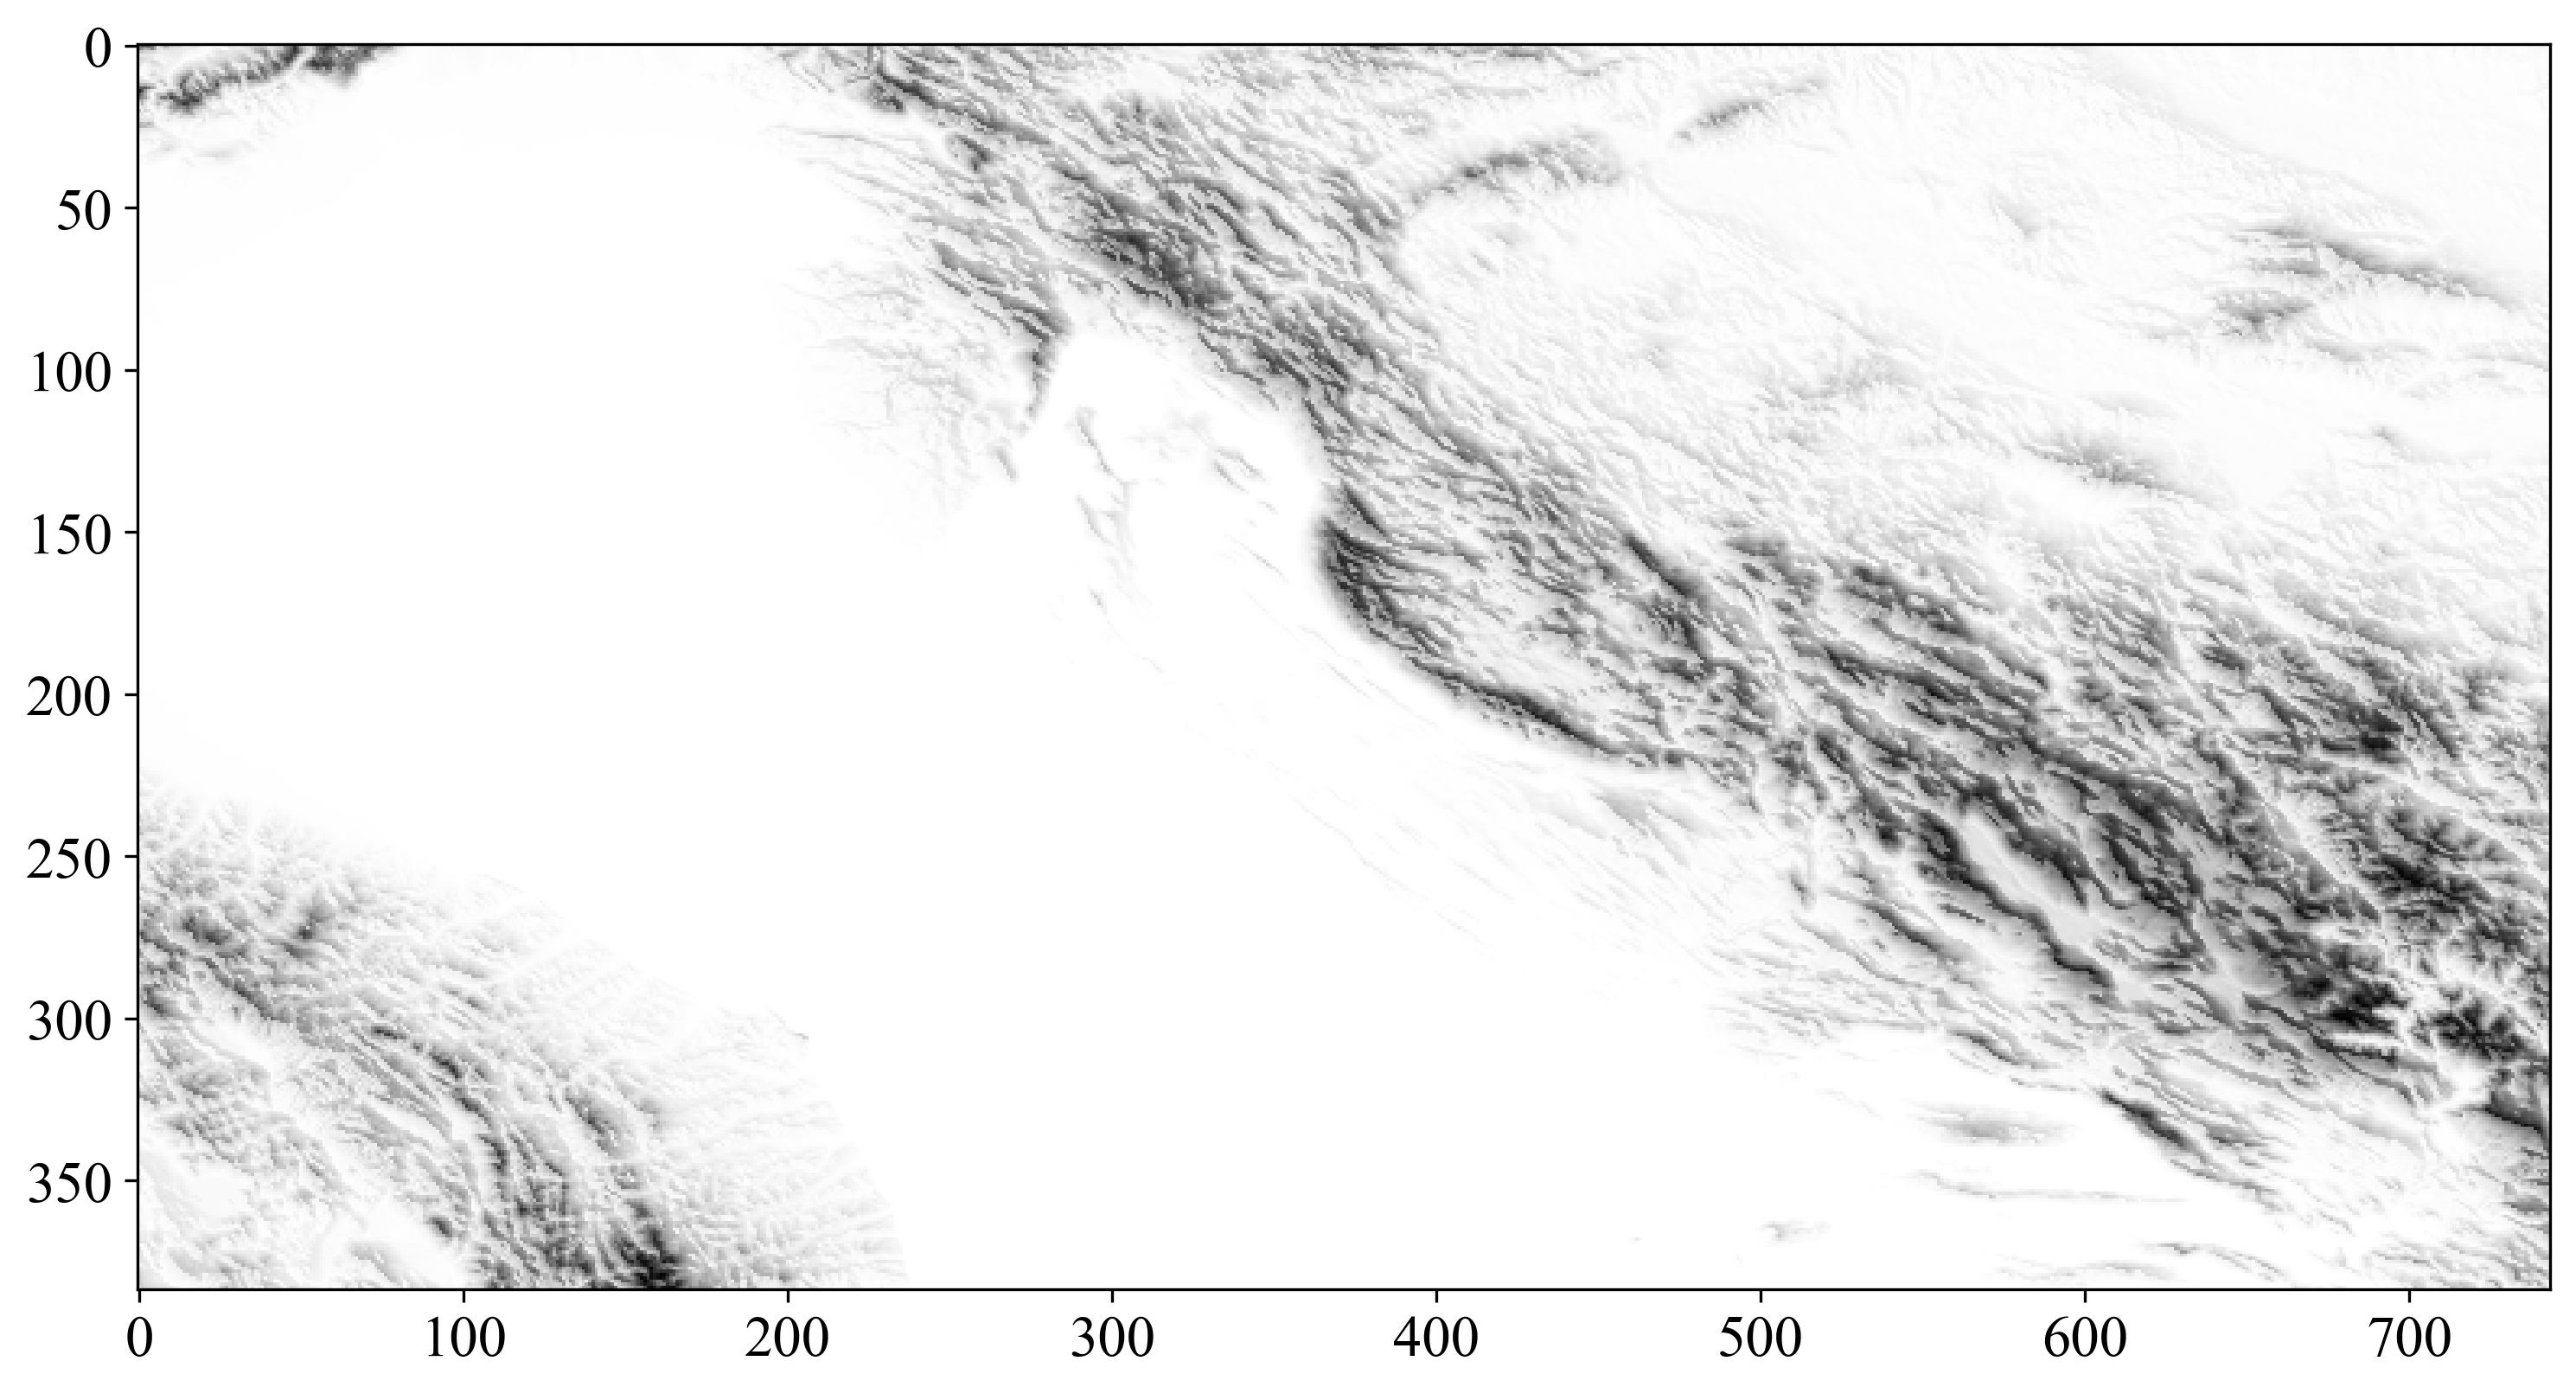

PyObject <matplotlib.image.AxesImage object at 0x7b0653d7a140>

In [36]:
shadedtopo = ls.shade(bathy2plot2, cmap=cmap, blend_mode="soft", vert_exag=0.1);
shadedtopo = permutedims(shadedtopo, [2, 1, 3])
plt.imshow(reverse(shadedtopo, dims=1))

## Create the plot

In [47]:
fig = plt.figure()
ax = plt.subplot(111, projection=theproj)
pcm = ax.pcolormesh(lonb, latb, bathy2plot1', vmin=-200, transform=datacrs, cmap=cmocean.cm.deep_r, zorder=6)
cb = plt.colorbar(pcm)
cb.set_label("Depth (m)", rotation=0, ha="left")
gl = ax.gridlines(draw_labels=true, linewidth=.5, color=".25", linestyle="-.", zorder=2)
ax.imshow(reverse(shadedtopo, dims=1), extent=[minimum(lonb), maximum(lonb), minimum(latb), maximum(latb)], 
    transform=datacrs, zorder=5, alpha=.94, regrid_shape=2000)
gl.top_labels = false
gl.right_labels = false
ax.add_feature(coast, linewidth=0.25, zorder=8)
ax.set_title("EMODnet Bathymetry")

LoadError: PyError ($(Expr(:escape, :(ccall(#= /home/ctroupin/.julia/packages/PyCall/1gn3u/src/pyfncall.jl:43 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))) <class 'ImportError'>
ImportError('Using image transforms requires either pykdtree or scipy.')
  File "/home/ctroupin/.julia/conda/3/x86_64/lib/python3.12/site-packages/cartopy/mpl/geoaxes.py", line 307, in wrapper
    return func(self, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/ctroupin/.julia/conda/3/x86_64/lib/python3.12/site-packages/cartopy/mpl/geoaxes.py", line 1312, in imshow
    from cartopy.img_transform import warp_array
  File "/home/ctroupin/.julia/conda/3/x86_64/lib/python3.12/site-packages/cartopy/img_transform.py", line 20, in <module>
    raise ImportError("Using image transforms requires either "


In [23]:
extrema(bathy)

(-264, 2135)